In [1]:
from pycocotools.coco import COCO

In [2]:
dataDir='datasets/coco'
dataType='val2017'
annFile='{}/annotations/semantic_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


In [4]:
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 95, 100, 107, 109, 112, 118, 119, 122, 125, 128, 130, 133, 138, 141, 144, 145, 147, 148, 149, 151, 154, 155, 156, 159, 161, 166, 168, 171, 175, 176, 177, 178, 180, 181, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [5]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush banner blanket bridge cardboard counter curtain door-stuff floor-wood flower fruit gravel house light mirror-stuff net pillow platform playingfield railroad river road roof sand sea shelf snow stairs tent towel wall-brick wall-stone wall-tile wall-wood water-other window-blind window-other tree-merged fence-merged ceiling-merged sky-other-merged cabinet-merge

In [20]:
imgIds = coco.getImgIds()
img = coco.loadImgs([9])[0]
img

{'license': 3,
 'file_name': '000000000009.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000000009.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-19 20:40:11',
 'flickr_url': 'http://farm5.staticflickr.com/4026/4622125393_84c1fdb8d6_z.jpg',
 'id': 9}

In [26]:
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
catIds = 
[(a['category_id'], a['bbox']) for a in anns]
#anns

[(51, [1.08, 187.69, 611.59, 285.84]),
 (51, [311.73, 4.31, 319.28, 228.68]),
 (56, [249.6, 229.27, 316.24, 245.08]),
 (51, [0.0, 13.51, 434.48, 375.12]),
 (55, [376.2, 40.36, 75.55, 46.53]),
 (55, [465.78, 38.97, 58.07, 46.67]),
 (55, [385.7, 73.66, 84.02, 70.51]),
 (55, [364.05, 2.49, 94.76, 71.07])]

In [29]:
list(zip(coco.getCatIds(), [cat['name'] for cat in coco.loadCats(coco.getCatIds())]))

[(1, 'person'),
 (2, 'bicycle'),
 (3, 'car'),
 (4, 'motorcycle'),
 (5, 'airplane'),
 (6, 'bus'),
 (7, 'train'),
 (8, 'truck'),
 (9, 'boat'),
 (10, 'traffic light'),
 (11, 'fire hydrant'),
 (13, 'stop sign'),
 (14, 'parking meter'),
 (15, 'bench'),
 (16, 'bird'),
 (17, 'cat'),
 (18, 'dog'),
 (19, 'horse'),
 (20, 'sheep'),
 (21, 'cow'),
 (22, 'elephant'),
 (23, 'bear'),
 (24, 'zebra'),
 (25, 'giraffe'),
 (27, 'backpack'),
 (28, 'umbrella'),
 (31, 'handbag'),
 (32, 'tie'),
 (33, 'suitcase'),
 (34, 'frisbee'),
 (35, 'skis'),
 (36, 'snowboard'),
 (37, 'sports ball'),
 (38, 'kite'),
 (39, 'baseball bat'),
 (40, 'baseball glove'),
 (41, 'skateboard'),
 (42, 'surfboard'),
 (43, 'tennis racket'),
 (44, 'bottle'),
 (46, 'wine glass'),
 (47, 'cup'),
 (48, 'fork'),
 (49, 'knife'),
 (50, 'spoon'),
 (51, 'bowl'),
 (52, 'banana'),
 (53, 'apple'),
 (54, 'sandwich'),
 (55, 'orange'),
 (56, 'broccoli'),
 (57, 'carrot'),
 (58, 'hot dog'),
 (59, 'pizza'),
 (60, 'donut'),
 (61, 'cake'),
 (62, 'chair'),
 (6

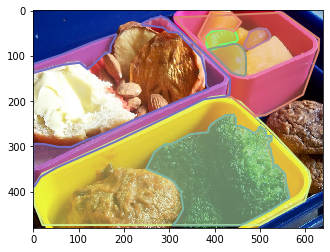

In [25]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
i = cv2.imread('datasets/coco/train2017/' + img['file_name'])
plt.imshow(i[:,:,::-1])
coco.showAnns(anns)

# Train semantic PyTorch

In [1]:
import sys
sys.path.append('/home/centrale/redev/redev_videosurbaines/train/pytorch_seg_ref_scripts')

In [2]:
import train  # reference script

import datetime
import os
import time

import torch
import torch.utils.data
from torch import nn
import torchvision

from coco_utils import get_coco
import transforms as T
import utils
import numpy as np

In [3]:
#dataset, num_classes = train.get_dataset("coco", "train", train.get_transform(train=True))
dataset_test, _ = train.get_dataset("coco", "val", train.get_transform(train=False))

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [9]:
#train_sampler = torch.utils.data.RandomSampler(dataset)
test_sampler = torch.utils.data.SequentialSampler(dataset_test)

#data_loader = torch.utils.data.DataLoader(
#        dataset, batch_size=8,
#        sampler=train_sampler, num_workers=16,
#        collate_fn=utils.collate_fn, drop_last=True)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1,
    sampler=test_sampler, num_workers=16,
    collate_fn=utils.collate_fn)

In [10]:
d = iter(data_loader_test)

In [11]:
imgs, targets = d.next()

In [12]:
imgs.shape

torch.Size([1, 3, 520, 781])